Package initialization

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Read, format and split into training and testing data

In [4]:
# Read the data into a Pandas DataFrame
data = pd.read_csv("W23 - heart_modified.csv")
display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,65,M,ASY,114,318,ST,140,N,4.4,Down,1
1,62,M,ASY,128,223,ST,119,Y,2.0,Down,1
2,56,M,ASY,140,298,Normal,122,Y,4.2,Flat,1
3,59,M,ASY,180,285,ST,120,Y,1.5,Flat,1
4,71,M,ASY,185,0,Normal,98,Y,0.0,Up,1
...,...,...,...,...,...,...,...,...,...,...,...
913,60,F,NAP,108,267,LVH,167,N,0.0,Up,0
914,57,M,ASY,120,182,Normal,150,N,0.0,Flat,1
915,71,M,ASY,140,187,LVH,144,Y,4.0,Up,1
916,42,M,ATA,120,200,Normal,160,Y,1.0,Flat,0


1. Download the data and input into numpy objects.

In [5]:
# Define the headers of the data to facilitate code at the end of the cell (when splitting into X and y data)
headers = pd.read_csv("W23 - heart_modified.csv").columns.to_list()

# Encode string parameters as integers
# Will facilitate the data analysis and binary classifier
data['Sex'] = data['Sex'].replace("M", 0)
data['Sex'] = data['Sex'].replace("F", 1)
data['ExerciseAngina'] = data['ExerciseAngina'].replace("N", 0)
data['ExerciseAngina'] = data['ExerciseAngina'].replace("Y", 1)
data['ChestPainType'] = data['ChestPainType'].replace("ASY", 0)
data['ChestPainType'] = data['ChestPainType'].replace("NAP", 1)
data['ChestPainType'] = data['ChestPainType'].replace("TA", 2)
data['ChestPainType'] = data['ChestPainType'].replace("ATA", 3)
data['RestingECG'] = data['RestingECG'].replace("Normal", 0)
data['RestingECG'] = data['RestingECG'].replace("LVH", 1)
data['RestingECG'] = data['RestingECG'].replace("ST", 2)
data['ST_Slope'] = data['ST_Slope'].replace("Flat", 0)
data['ST_Slope'] = data['ST_Slope'].replace("Down", 1)
data['ST_Slope'] = data['ST_Slope'].replace("Up", 2)
data_np = data.to_numpy()

X, y = data_np[:, 0:len(headers)-2], data_np[:, len(headers)-1]

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)


2. [PA] Perform basic statistical analysis on the data using python packages such as NumPy.
3. [PA]Create 1-2 visualizations of the data using python packages such matplotlib.

Parts 2 and 3 are both covered in the following code. For the basic statistical analysis, the correlation between the parameters was calculated and subsequently visualized using a heatmap. Further visualization is done by plotting the class distribution of the training and testing data. 

Heatmap for correlation between continuous variables and y variable

<AxesSubplot: >

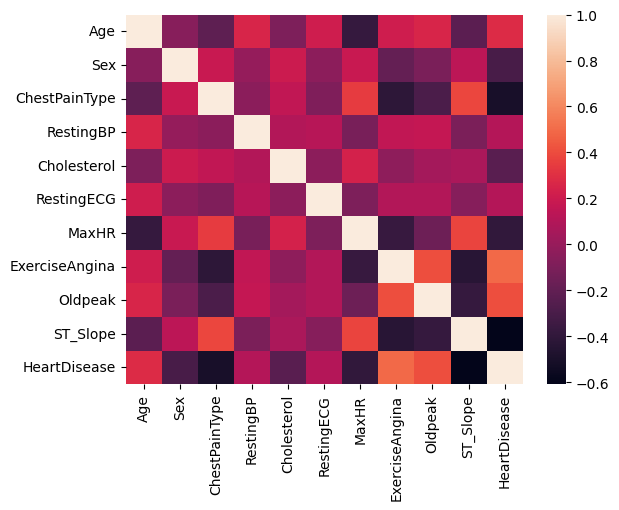

In [6]:
import seaborn as sns

# Create heatmap
sns.heatmap(data.corr())

Plot class distribution for training and testing data

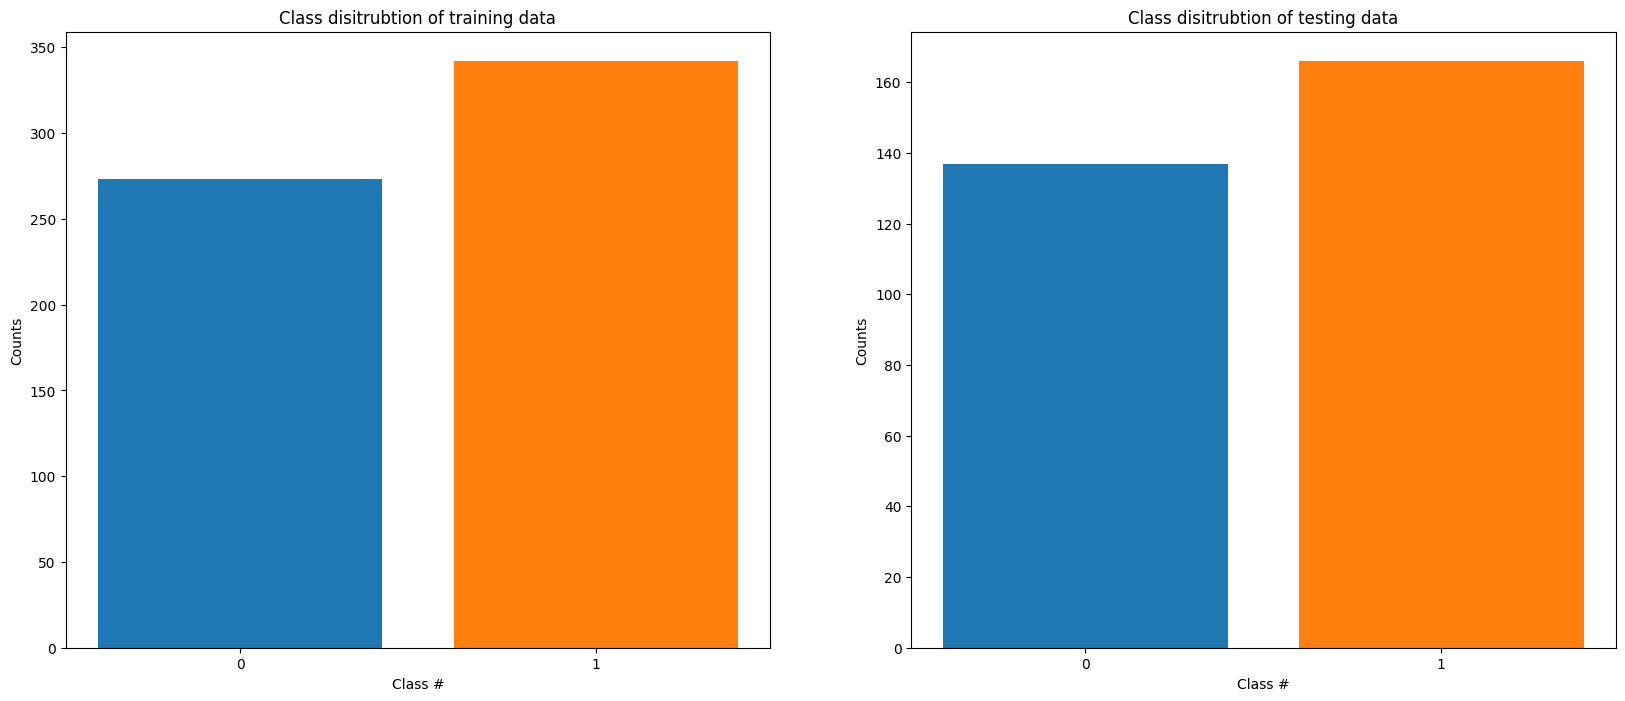

In [7]:
'''
The following are class distributions.
This will help visualize how the training and testing data were split when the Scikit function 'train_test_split' was executed
'''

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

# Plot class distribution of training data
labels, counts = np.unique(y_train, return_counts=True)
ax1.bar(labels, counts, align='center', color=plt.cm.get_cmap('tab10').colors)
ax1.set_xticks(labels)
ax1.set_xticklabels([0, 1])
ax1.set_title("Class disitrubtion of training data")
ax1.set_xlabel("Class #")
ax1.set_ylabel("Counts")

# Plot class distribution of testing data
labels, counts = np.unique(y_test, return_counts=True)
ax2.bar(labels, counts, align='center', color=plt.cm.get_cmap('tab10').colors)
ax2.set_xticks(labels)
ax2.set_xticklabels([0, 1])
ax2.set_title("Class disitrubtion of testing data")
ax2.set_xlabel("Class #")
ax2.set_ylabel("Counts")

plt.show()


4. [DE] Use Scikit and implement at least one learning algorithm to create a binary
classifier.

In [8]:
# Use Scikit's logistic regression model as a binary classifier for fitting and predicting the data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

5. [DE] Calculate the prediction accuracy of the classifier and create the confusion
matrix to report on recall and precision. Elaborate on what this information
communicates about the classifier you have created.

In [14]:
# Caluclate accuracy by determining how many of the predicted labels match the testing labels
accuracy = np.sum(y_test == y_pred) / len(y_pred)
print(accuracy)
'''
The accuracy metric informs us of the effectiveness of the model to understand the data and make accurate predictions.
'''

cm = confusion_matrix(y_test, y_pred)
print(cm)

0.8382838283828383
[[108  29]
 [ 20 146]]
